In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
df_relax     = pd.read_csv("relax.csv")
df_optimized = pd.read_csv("relaxOptimized.csv")
df_openmp    = pd.read_csv("relaxOpenMP.csv")
df_mpi       = pd.read_csv("relaxMPI.csv")

df_relax["size"] = df_relax["size"].div(1000)
df_optimized["size"] = df_optimized["size"].div(1000)
df_openmp["size"] = df_openmp["size"].div(1000)
df_mpi["size"] = df_mpi["size"].div(1000)

In [110]:
df_relax_grouped     = df_relax.groupby("size").mean().reset_index()
df_optimized_grouped = df_optimized.groupby("size").mean().reset_index()
df_openmp_grouped    = df_openmp.groupby(["size", "threads"]).mean().reset_index()
df_mpi_grouped       = df_mpi.groupby(["size", "threads"]).mean().reset_index()

In [118]:
def plot_line(df, ax, label, linestyle="-"):
    df.plot(kind="line", x="size", y="duration",
            label=label, ax=ax, linewidth=1,
            linestyle=linestyle)
    
    ma = df["duration"].rolling(5, min_periods=1).mean()
    mstd = df["duration"].rolling(5, min_periods=1).std()
    plt.fill_between(df["size"], ma - 2 * mstd, ma + 2 * mstd, alpha=0.15)

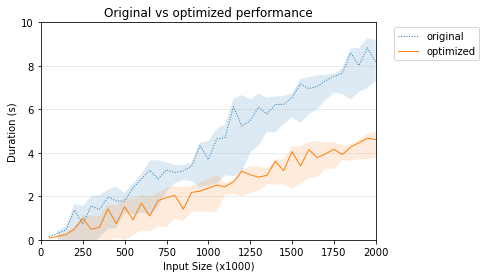

In [119]:
ax = plt.gca()

plot_line(df_relax_grouped, ax, "original", ":")
plot_line(df_optimized_grouped, ax, "optimized")

plt.title("Original vs optimized performance")
plt.xlabel("Input Size (x1000)")
plt.ylabel("Duration (s)")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.xlim(0, 2000)
plt.ylim(0, 10)

plt.show()

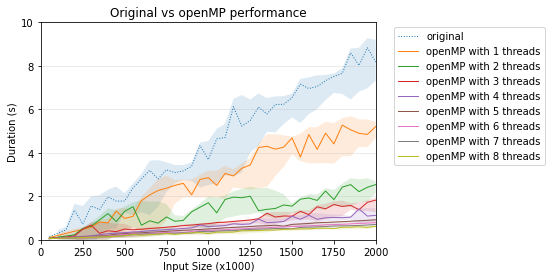

In [129]:
ax = plt.gca()

plot_line(df_relax_grouped, ax, "original", ":")

for name, group in df_openmp_grouped.groupby("threads"):
    label = f"openMP with {name} threads"
    plot_line(group, ax, label)

plt.title("Original vs openMP performance")
plt.xlabel("Input Size (x1000)")
plt.ylabel("Duration (s)")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.xlim(0, 2000)
plt.ylim(0, 10)

plt.show()

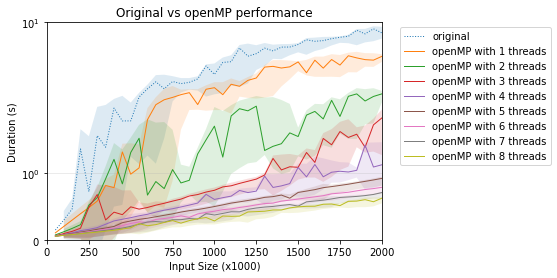

In [130]:
ax = plt.gca()

plot_line(df_relax_grouped, ax, "original", ":")

for name, group in df_openmp_grouped.groupby("threads"):
    label = f"openMP with {name} threads"
    plot_line(group, ax, label)

plt.title("Original vs openMP performance")
plt.xlabel("Input Size (x1000)")
plt.ylabel("Duration (s)")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid(axis="y", alpha=0.3)
plt.xlim(0, 2000)
plt.ylim(0, 10)
plt.yscale("symlog")

plt.show()